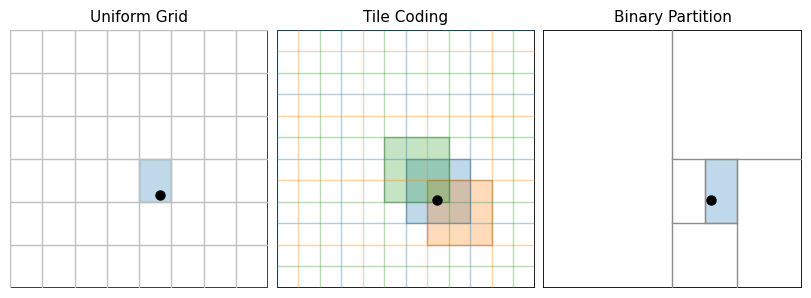

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

# ============================================================
# Combined schematic: 3 columns (Uniform Grid | Tile Coding | Binary Partition)
# - Titles (headers) restored.
# - No legends, labels, or ticks.
# - First two use a smaller domain [0, 0.5] × [0, 0.5].
# - Uniform grid highlight color now matches the binary partition (C3).
# ============================================================

def style_axes(ax):
    ax.set_aspect('equal', adjustable='box')
    ax.set_xticks([]); ax.set_yticks([])
    for spine in ax.spines.values():
        spine.set_visible(False)

# ---------- 1) Uniform grid ----------
def draw_uniform_grid(ax, xlim=(0.0, 0.5), ylim=(0.0, 0.5), nx=8, ny=6, test_point=(0.31, 0.17)):
    xmin, xmax = xlim; ymin, ymax = ylim
    dx = (xmax - xmin) / nx
    dy = (ymax - ymin) / ny

    # grid lines
    for i in range(nx + 1):
        x = xmin + i * dx
        ax.plot([x, x], [ymin, ymax], lw=1.0, color='0.75')
    for j in range(ny + 1):
        y = ymin + j * dy
        ax.plot([xmin, xmax], [y, y], lw=1.0, color='0.75')

    # containing cell (clamped)
    ix = int(np.floor((test_point[0] - xmin) / dx)); ix = np.clip(ix, 0, nx - 1)
    iy = int(np.floor((test_point[1] - ymin) / dy)); iy = np.clip(iy, 0, ny - 1)
    cell_x = xmin + ix * dx
    cell_y = ymin + iy * dy

    # boundary + highlight + point
    ax.add_patch(Rectangle((xmin, ymin), xmax - xmin, ymax - ymin, fill=False, edgecolor='k', lw=1.25))
    ax.add_patch(Rectangle((cell_x, cell_y), dx, dy, facecolor='C0', edgecolor='k', lw=1.0, alpha=0.28))  # match binary partition color
    ax.plot(test_point[0], test_point[1], 'o', ms=6.5, color='k')

    ax.set_xlim(xlim); ax.set_ylim(ylim)
    ax.set_title('Uniform Grid', fontsize=11, pad=6)

# ---------- 2) Tile coding (multiple overlaid lattices with offsets) ----------
def draw_tile_coding(ax, xlim=(0.0, 0.5), ylim=(0.0, 0.5), nx=8, ny=8,
                     test_point=(0.31, 0.17),
                     offsets=((0.00, 0.00), (1/3, 2/3), (2/3, 1/3)),
                     colors=('C0','C1','C2')):
    xmin, xmax = xlim; ymin, ymax = ylim
    dx = (xmax - xmin) / nx
    dy = (ymax - ymin) / ny

    for (fx, fy), color in zip(offsets, colors):
        xoff = fx * dx; yoff = fy * dy

        # grid lines for this tiling
        start_x = xmin + (xoff % dx) - dx
        start_y = ymin + (yoff % dy) - dy
        for xv in np.arange(start_x, xmax + dx, dx):
            ax.plot([xv, xv], [ymin, ymax], lw=1.0, color=color, alpha=0.35)
        for yh in np.arange(start_y, ymax + dy, dy):
            ax.plot([xmin, xmax], [yh, yh], lw=1.0, color=color, alpha=0.35)

        # activated cell (same color)
        kx = int(np.floor((test_point[0] - xmin - xoff) / dx))
        ky = int(np.floor((test_point[1] - ymin - yoff) / dy))
        cell_x = xmin + xoff + kx * dx
        cell_y = ymin + yoff + ky * dy

        # clamp to domain
        draw_x = max(cell_x, xmin)
        draw_y = max(cell_y, ymin)
        draw_w = min(cell_x + dx, xmax) - draw_x
        draw_h = min(cell_y + dy, ymax) - draw_y
        if draw_w > 0 and draw_h > 0:
            ax.add_patch(Rectangle((draw_x, draw_y), draw_w, draw_h,
                                   facecolor=color, edgecolor='k', lw=1.0, alpha=0.28))

    ax.add_patch(Rectangle((xmin, ymin), xmax - xmin, ymax - ymin, fill=False, edgecolor='k', lw=1.25))
    ax.plot(test_point[0], test_point[1], 'o', ms=6.5, color='k')
    ax.set_xlim(xlim); ax.set_ylim(ylim)
    ax.set_title('Tile Coding', fontsize=11, pad=6)

# ---------- 3) Binary partition (draw only the split lines along the chosen path) ----------
def draw_binary_partition(ax, xlim=(0.0, 1.0), ylim=(0.0, 1.0), depth=5, test_point=(0.63, 0.27)):
    xmin, xmax = xlim; ymin, ymax = ylim
    ax.add_patch(Rectangle((xmin, ymin), xmax - xmin, ymax - ymin, fill=False, edgecolor='k', lw=1.25))

    # walk down the kd-tree; draw the split segment only inside the current rectangle
    rx0, ry0, rx1, ry1 = xmin, ymin, xmax, ymax
    for level in range(depth):
        if level % 2 == 0:
            xmid = 0.5 * (rx0 + rx1)
            ax.plot([xmid, xmid], [ry0, ry1], lw=1.0, color='0.55')
            if test_point[0] < xmid:
                rx1 = xmid
            else:
                rx0 = xmid
        else:
            ymid = 0.5 * (ry0 + ry1)
            ax.plot([rx0, rx1], [ymid, ymid], lw=1.0, color='0.55')
            if test_point[1] < ymid:
                ry1 = ymid
            else:
                ry0 = ymid

    # highlight the final leaf and the test point
    ax.add_patch(Rectangle((rx0, ry0), rx1 - rx0, ry1 - ry0, facecolor='C0', edgecolor='k', lw=1.0, alpha=0.28))
    ax.plot(test_point[0], test_point[1], 'o', ms=6.5, color='k')
    ax.set_xlim(xlim); ax.set_ylim(ylim)
    ax.set_title('Binary Partition', fontsize=11, pad=6)

# -------------------- Compose figure --------------------
fig, axes = plt.subplots(1, 3, figsize=(8, 4), constrained_layout=True)
for ax in axes: style_axes(ax)

draw_uniform_grid(axes[0],
                  xlim=(0.0, 0.5), ylim=(0.0, 0.5),
                  nx=8, ny=6,
                  test_point=(0.29, 0.18))

draw_tile_coding(axes[1],
                 xlim=(0.0, 0.5), ylim=(0.0, 0.5),
                 nx=4, ny=4,
                 test_point=(0.31, 0.17),
                 offsets=((0.00, 0.00), (1/3, 2/3), (2/3, 1/3)),
                 colors=('C0','C1','C2'))

draw_binary_partition(axes[2],
                      xlim=(0.0, 1.0), ylim=(0.0, 1.0),
                      depth=5,
                      test_point=(0.65, 0.34))

plt.savefig('../../results/figures/schematics/discretisation.pdf', bbox_inches='tight')
plt.show()